# Strain rate vs time as a function of temperature and stress

## Data
The response of unaxial creep deformation of <001> orientated CMSX-4 single crystal superalloy at a wide range of constant loading conditions have been documented in the assigned research paper. The graphs obtained for 3 different values of stress $\sigma$ and temperature $T$ are the following :

(a) Data for loading at $750^0C$ and $750 MPa$. `DATA_Reed_etal/dataimg1.png` <br>
(b) Data for loading at $950^0C$ and $185 MPa$. `DATA_Reed_etal/dataimg2.png` <br>
(c) Data for loading at $1150^C$ and $100 MPa$. `DATA_Reed_etal/dataimg3.png` <br>

### Imports

In [1]:
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
matplotlib.rcParams.update({'font.size': 14,'font.family':'serif'})

### Strain rate $\dot{\epsilon}$ vs strain $\epsilon$ as a function of temperature $T$ and stress $\sigma$
The data collected from the above graphs have been plotted in the same graph to gain insights on the behavior of the material at different states. 

In [2]:
img1 = imread('DATA_Reed_etal/1150C100MPa.png')
img1str = imread('DATA_Reed_etal/str_1150C100MPa.png')
img3 = imread('DATA_Reed_etal/750C750MPa.png')
img3str = imread('DATA_Reed_etal/str_750C750MPa.png')
img2 = imread('DATA_Reed_etal/950C185MPa.png')
img2str = imread('DATA_Reed_etal/str_950C185MPae.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1str = cv2.cvtColor(img1str, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2str = cv2.cvtColor(img2str, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img3str = cv2.cvtColor(img3str, cv2.COLOR_BGR2GRAY)

def get_scaled_array_from_graph(img,Xmin,Xmax,Ymin,Ymax):  
    IMG = np.transpose(img)
    Yrange = np.shape(img)[1]
    ARR = np.zeros(np.shape(IMG)[0])
    for i in range(np.shape(IMG)[0]):
        pts = np.where(IMG[i] < 0.4)
        ARR[i] = Yrange - np.mean(pts[0])
        
    numXpts = np.shape(ARR)[0]
    scaledARR = np.zeros(int(np.floor(Xmax-Xmin)))
    for i in range(len(scaledARR)):
        j = int(np.floor( (i/len(scaledARR))*numXpts ))
        Yval = Ymin + (ARR[j]/Yrange)*(Ymax-Ymin)
        scaledARR[i] = Yval
    return scaledARR

def get_array_derrivative(ARR):
    DERR = np.zeros(np.shape(ARR)[0]-1)
    for i in range(len(DERR)):
        DERR[i] = ARR[i+1]-ARR[i]
    return DERR

SvsT_a  = get_scaled_array_from_graph(img1,0,200,0,0.15)
SvsT_b  = get_scaled_array_from_graph(img2,0,2000,0,0.06)
SvsT_c  = get_scaled_array_from_graph(img3,0,300,0,0.25)

SRvsT_a = get_array_derrivative(SvsT_a)
SRvsT_b = get_array_derrivative(SvsT_b)
SRvsT_c = get_array_derrivative(SvsT_c)

SRvsS_a = get_scaled_array_from_graph(img1str,0,120,-9,-4)
SRvsS_b = get_scaled_array_from_graph(img2str,0,120,-10,-7)
SRvsS_c = get_scaled_array_from_graph(img3str,0,500,-7,-5)

/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
def plot_strain_rate_vs_strain():
    fig = plt.figure(figsize=(10,10))
    
    plt.plot(SRvsS_a,'b', linewidth=1.5)
    plt.plot(SRvsS_b,'r', linewidth=1.5)
    plt.plot(SRvsS_c,'y', linewidth=1.5)

    leg = plt.legend(["$1150^0C - 100MPa$","$950^0C-185MPa$","$750^0C-750MPa$"],
               labelspacing=1.5, borderpad=1,fontsize=18,loc=4)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    X = np.linspace(0,500,5)
    X_val = np.linspace(0,0.25,5)
    plt.xticks(X,X_val)
    plt.xlabel("Strain $\epsilon$",fontsize=20)
    plt.ylabel("Strain rate $\log{(\dot{\epsilon})}$",fontsize=20)
    
    plt.show()

/home/sironton/anaconda3/envs/tensorflow_cpu/lib/python3.7/site-packages/matplotlib/mathtext.py:2562: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


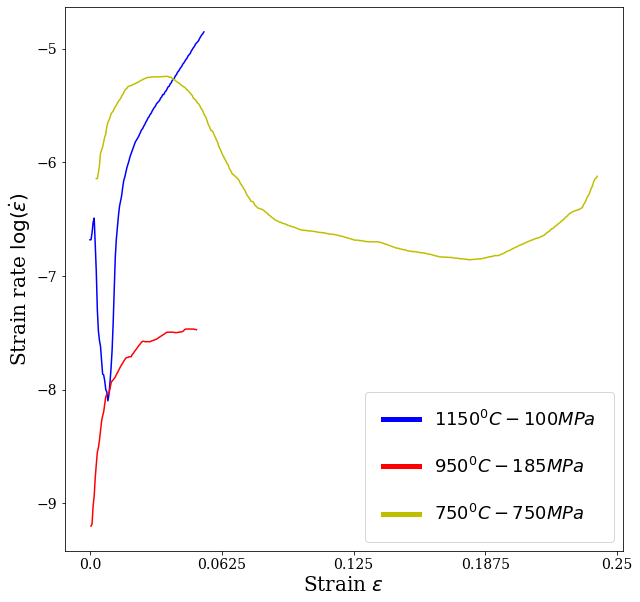

In [6]:
plot_strain_rate_vs_strain()

#### Key observations : 
1. Strain at rupture decreased with increasing temperature. [The red curve did not rupture]
2. Only the green curve [T=$750^0$C, P=750MPa] has undergone steady state creep.
3. The decrease in strain rate with increasing strain in curves yellow and blue might indicate a creep hardening mechanism similar to strain hardening.
4. From the $\sigma$ vs $t$ plot its seems as if the material undergoes steady state at T=$1150^0$C, P=100MPa but plotting $\dot{\epsilon}$ vs $\sigma$ shows that it is not a stedy state. In fact the material at that temperature did not undergo a steady state at all. 

## Strain rate $\dot{\epsilon}$ vs time $t$ as a function of temperature $T$ and stress $\sigma$
The one dimentional derrivative of the strain $\sigma$ vs time $t$ curves obtained above have been presented here. The portion near the origin is zoomed in for visual clarity. 

In [3]:
def plot_strain_rate_vs_time():
    plt.figure(figsize=(10,10))

    plt.plot(SRvsT_a, 'b')
    plt.plot(SRvsT_b, 'r')
    plt.plot(SRvsT_c, 'y')

    leg = plt.legend(["$1150^0C - 100MPa$","$950^0C-185MPa$","$750^0C-750MPa$"],
           labelspacing=1.5, borderpad=1,fontsize=18)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
        
    X = np.linspace(0,2000,5)
    plt.xticks(X,X)
    plt.xlabel("Time in hours $t$",fontsize=18)
    plt.ylabel("Strain rate $\dot{\epsilon}$($dt$=1hr)",fontsize=18)


    sub_ax = plt.axes([.32, .32, .4, .42])
    sub_ax.set_xlim([0,250])
    sub_ax.set_ylim([-0.001,0.006])
    plt.plot(SRvsT_a[1:250])
    plt.plot(SRvsT_b[1:250])
    plt.plot(SRvsT_c[1:250])

    X = np.linspace(0,250,5)
    plt.xticks(X,X)
    plt.ylabel("Strain rate $\dot{\epsilon}$($dt$=1hr)",fontsize=18)
    plt.xlabel("Time in hours $t$",fontsize=18)

    plt.show()

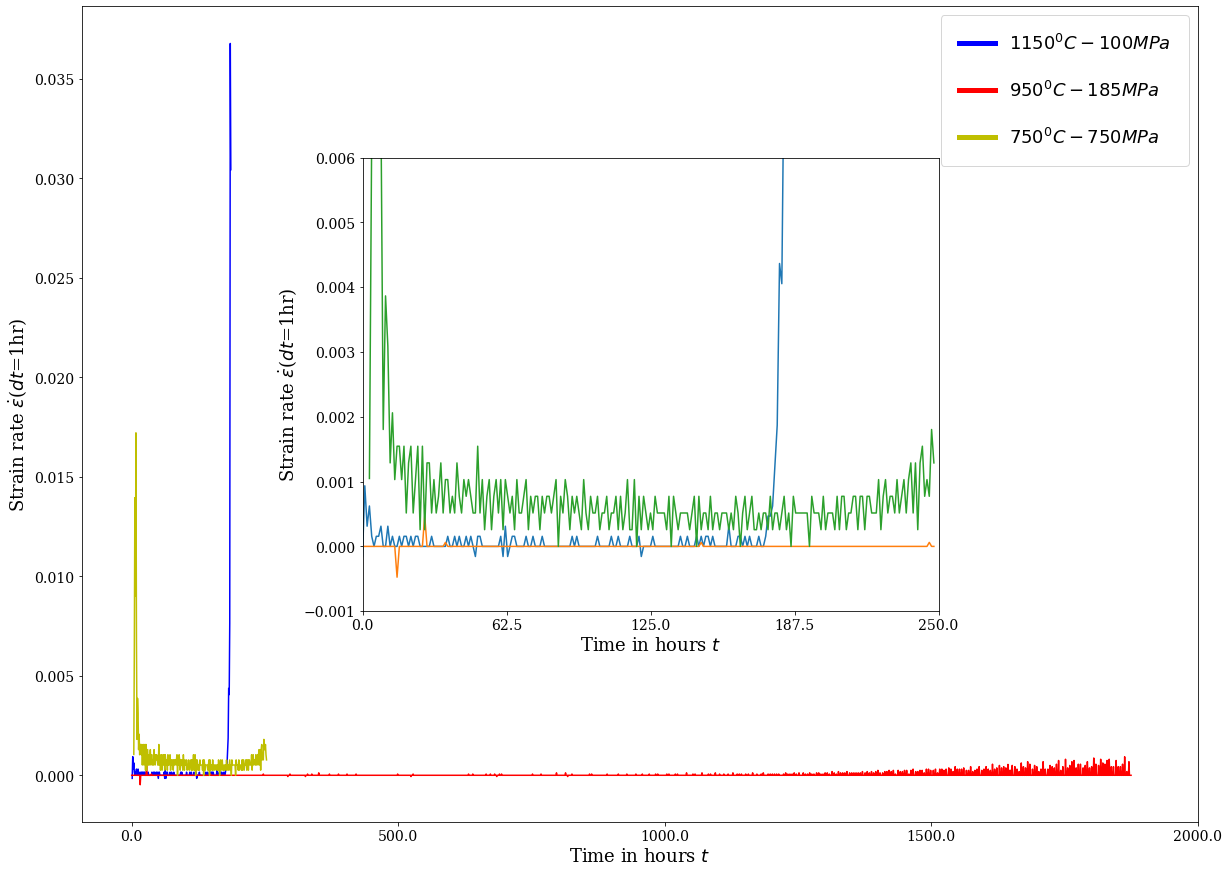

In [5]:
plot_strain_rate_vs_time()

#### Key observations : 
1. The blue curve at the highest temperature of $1150^0C$ is seen to undergo the tertiary stage first. We can say that above $1150^0C$ the material would last for less then 180 hrs. 
2. Even here the initial decrease in strain rate in all three curves suggest a creep hardening mechanism.
3. The time scale of the red curve makes a false impression of reaching the steady state which can be clarified by looking at the previous $\dot{\epsilon}$ vs $\sigma$ plot

# Reference :
[1] ```
CREEP OF CMSX-4 SUPERALLOY SINGLE CRYSTALS: EFFECTS OF RAFTING AT HIGH TEMPERATURE
R. C. REED, N. MATAN, D. C. COX, M. A. RIST and C. M. F. RAE
Department of Materials Science and Metallurgy, University of Cambridge/Rolls-Royce University Technology  Centre, Pembroke Street, Cambridge CB2 3QZ, U.K.
```